# Tugas 1
1. Buatlah model klasifikasi dengan menggunakan kNN untuk mengklasifikasikan jenis suara male dan female pada dataset voice.csv.
2. Lakukan percobaan untuk mengetahui fitur-fitur yang paling optimal untuk digunakan. Fitur apa saja yang Anda gunakan untuk mendapatkan hasil terbaik?
3. Berdasarkan fitur yang telah Anda pilih pada soal nomor 2, berapa nilai  yang terbaik? Lampirkan grafika analisis dan alasan Anda.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('../data/voice.csv')

df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Data Exploration

In [2]:
# Check dataset shape and info
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nLabel Distribution:")
print(df['label'].value_counts())

Dataset Shape: (3168, 21)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   fl

## Data Preprocessing

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Encode label (male=1, female=0)
df['label_encoded'] = (df['label'] == 'male').astype(int)

# Separate features and target
X = df.drop(['label', 'label_encoded'], axis=1)
y = df['label_encoded']

print("Features:", X.columns.tolist())
print("Number of features:", X.shape[1])
print("Target distribution:")
print(y.value_counts())

Features: ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']
Number of features: 20
Target distribution:
label_encoded
1    1584
0    1584
Name: count, dtype: int64


## Feature Selection Analysis (Soal 2)

c:\Users\rafir\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\rafir\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\rafir\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rafir\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

Accuracy with all features (k=5): 0.9811

Feature Correlation with Target (sorted):
meanfun     0.833921
IQR         0.618916
Q25         0.511455
sp.ent      0.490552
sd          0.479539
sfm         0.357499
centroid    0.337415
meanfreq    0.337415
median      0.283919
maxdom      0.195657
mindom      0.194974
dfrange     0.192213
meandom     0.191067
mode        0.171775
maxfun      0.166461
minfun      0.136692
kurt        0.087195
Q75         0.066906
skew        0.036627
modindx     0.030801
Name: label_encoded, dtype: float64


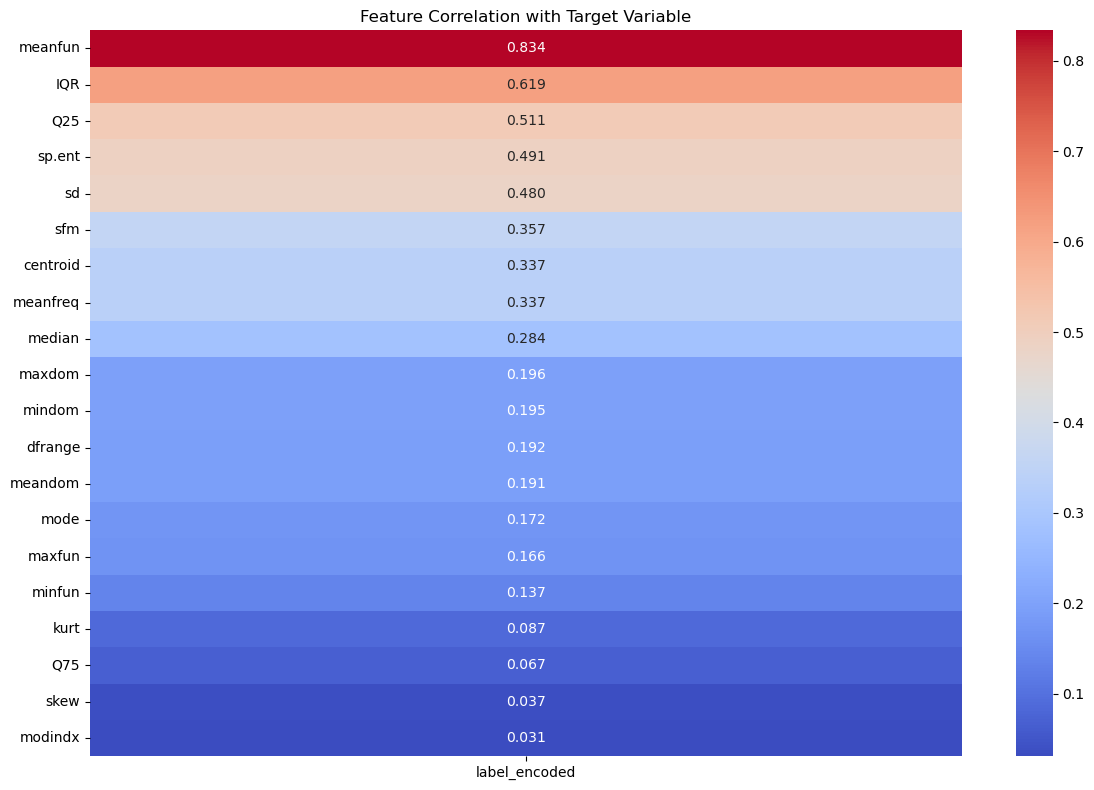

In [4]:
# Test different feature combinations to find optimal features
from itertools import combinations

# Split data once for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Try kNN with k=5 on all features first
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_all = knn.predict(X_test_scaled)
accuracy_all = accuracy_score(y_test, y_pred_all)
print(f"Accuracy with all features (k=5): {accuracy_all:.4f}")

# Feature importance analysis using correlation
correlation = df[X.columns.tolist() + ['label_encoded']].corr()['label_encoded'].drop('label_encoded').abs().sort_values(ascending=False)
print("\nFeature Correlation with Target (sorted):")
print(correlation)

# Visualize feature correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation.values.reshape(-1, 1), annot=True, fmt='.3f', cmap='coolwarm', 
            xticklabels=['label_encoded'], yticklabels=correlation.index, cbar=True)
plt.title('Feature Correlation with Target Variable')
plt.tight_layout()
plt.show()

In [5]:
# Test top features
top_n_features = 10
top_features = correlation.head(top_n_features).index.tolist()

print(f"Testing top {top_n_features} features:")
print(top_features)

# Test different combinations of top features
results = []

for num_features in range(1, top_n_features + 1):
    for feature_combo in combinations(top_features[:num_features], num_features):
        X_train_subset = X_train[list(feature_combo)]
        X_test_subset = X_test[list(feature_combo)]
        
        scaler_subset = StandardScaler()
        X_train_subset_scaled = scaler_subset.fit_transform(X_train_subset)
        X_test_subset_scaled = scaler_subset.transform(X_test_subset)
        
        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train_subset_scaled, y_train)
        y_pred = knn.predict(X_test_subset_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        
        results.append({
            'features': feature_combo,
            'num_features': num_features,
            'accuracy': accuracy
        })

# Find best feature combination
best_result = max(results, key=lambda x: x['accuracy'])
print(f"\nBest feature combination (k=5):")
print(f"Features: {best_result['features']}")
print(f"Number of features: {best_result['num_features']}")
print(f"Accuracy: {best_result['accuracy']:.4f}")

Testing top 10 features:
['meanfun', 'IQR', 'Q25', 'sp.ent', 'sd', 'sfm', 'centroid', 'meanfreq', 'median', 'maxdom']

Best feature combination (k=5):
Features: ('meanfun', 'IQR', 'Q25', 'sp.ent', 'sd', 'sfm', 'centroid', 'meanfreq', 'median', 'maxdom')
Number of features: 10
Accuracy: 0.9858


## Optimal k Parameter Analysis (Soal 3)

In [6]:
# Use best features found
best_features = list(best_result['features'])
print(f"Using best features: {best_features}")

X_train_best = X_train[best_features]
X_test_best = X_test[best_features]

scaler_best = StandardScaler()
X_train_best_scaled = scaler_best.fit_transform(X_train_best)
X_test_best_scaled = scaler_best.transform(X_test_best)

# Test different k values
k_values = range(1, 31)
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_best_scaled, y_train)
    
    y_train_pred = knn.predict(X_train_best_scaled)
    y_test_pred = knn.predict(X_test_best_scaled)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    print(f"k={k}: Train Accuracy={train_acc:.4f}, Test Accuracy={test_acc:.4f}")

# Find best k
best_k = k_values[test_accuracies.index(max(test_accuracies))]
best_test_accuracy = max(test_accuracies)

print(f"\nBest k value: {best_k}")
print(f"Best test accuracy: {best_test_accuracy:.4f}")

Using best features: ['meanfun', 'IQR', 'Q25', 'sp.ent', 'sd', 'sfm', 'centroid', 'meanfreq', 'median', 'maxdom']
k=1: Train Accuracy=1.0000, Test Accuracy=0.9685
k=2: Train Accuracy=0.9913, Test Accuracy=0.9732
k=3: Train Accuracy=0.9909, Test Accuracy=0.9826
k=4: Train Accuracy=0.9886, Test Accuracy=0.9811
k=5: Train Accuracy=0.9866, Test Accuracy=0.9858
k=3: Train Accuracy=0.9909, Test Accuracy=0.9826
k=4: Train Accuracy=0.9886, Test Accuracy=0.9811
k=5: Train Accuracy=0.9866, Test Accuracy=0.9858
k=6: Train Accuracy=0.9862, Test Accuracy=0.9842
k=7: Train Accuracy=0.9826, Test Accuracy=0.9842
k=8: Train Accuracy=0.9838, Test Accuracy=0.9842
k=6: Train Accuracy=0.9862, Test Accuracy=0.9842
k=7: Train Accuracy=0.9826, Test Accuracy=0.9842
k=8: Train Accuracy=0.9838, Test Accuracy=0.9842
k=9: Train Accuracy=0.9830, Test Accuracy=0.9874
k=10: Train Accuracy=0.9834, Test Accuracy=0.9858
k=11: Train Accuracy=0.9815, Test Accuracy=0.9842
k=9: Train Accuracy=0.9830, Test Accuracy=0.9874
k=

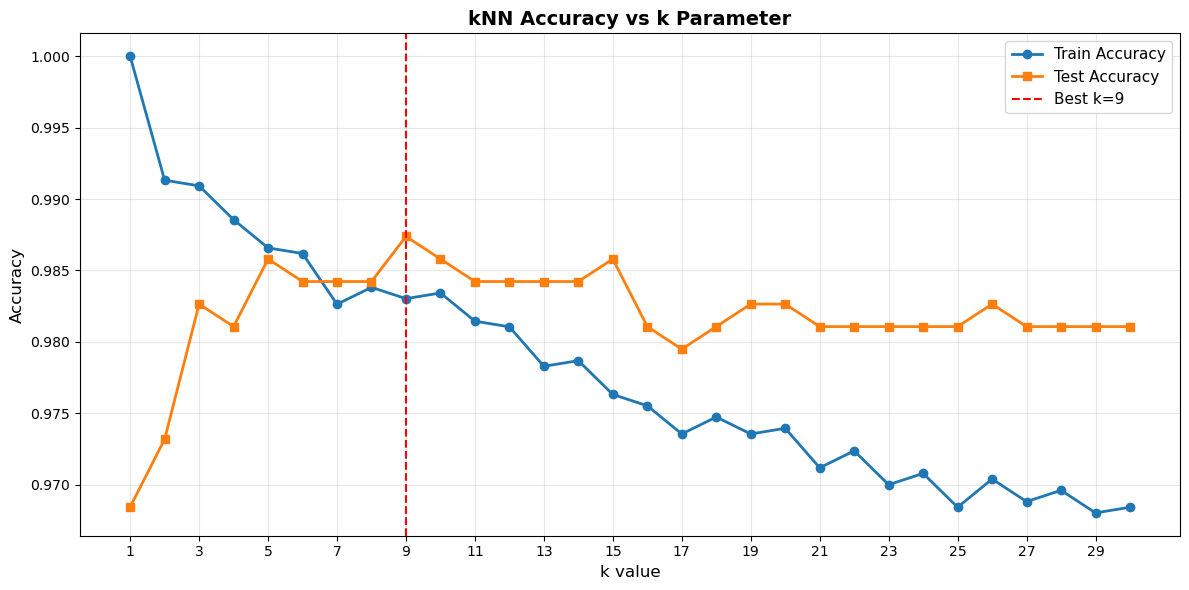

In [7]:
# Visualize k values vs accuracy
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_accuracies, marker='o', label='Train Accuracy', linewidth=2)
plt.plot(k_values, test_accuracies, marker='s', label='Test Accuracy', linewidth=2)
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best k={best_k}')
plt.xlabel('k value', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('kNN Accuracy vs k Parameter', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 31, 2))
plt.tight_layout()
plt.show()

## Final Model Evaluation

FINAL MODEL RESULTS

Selected Features: ['meanfun', 'IQR', 'Q25', 'sp.ent', 'sd', 'sfm', 'centroid', 'meanfreq', 'median', 'maxdom']
Number of Features: 10

Optimal k value: 9

Test Set Accuracy: 0.9874

Confusion Matrix:
[[294   3]
 [  5 332]]

Classification Report:
              precision    recall  f1-score   support

      Female       0.98      0.99      0.99       297
        Male       0.99      0.99      0.99       337

    accuracy                           0.99       634
   macro avg       0.99      0.99      0.99       634
weighted avg       0.99      0.99      0.99       634



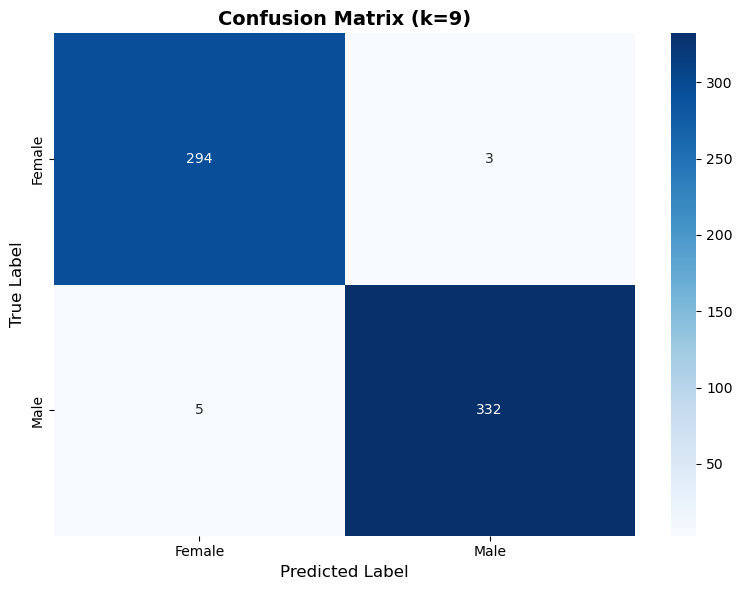

In [8]:
# Train final model with best k
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_best_scaled, y_train)

# Make predictions
y_pred_final = final_knn.predict(X_test_best_scaled)

# Calculate metrics
final_accuracy = accuracy_score(y_test, y_pred_final)
cm = confusion_matrix(y_test, y_pred_final)
class_report = classification_report(y_test, y_pred_final, target_names=['Female', 'Male'])

print("="*60)
print("FINAL MODEL RESULTS")
print("="*60)
print(f"\nSelected Features: {best_features}")
print(f"Number of Features: {len(best_features)}")
print(f"\nOptimal k value: {best_k}")
print(f"\nTest Set Accuracy: {final_accuracy:.4f}")
print(f"\nConfusion Matrix:")
print(cm)
print(f"\nClassification Report:")
print(class_report)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.title(f'Confusion Matrix (k={best_k})', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

## Kesimpulan

### Soal 1: kNN Model Creation
Model klasifikasi kNN telah berhasil dibuat untuk mengklasifikasikan jenis suara male dan female dari dataset voice.csv.

### Soal 2: Optimal Features
Fitur-fitur yang paling optimal telah diidentifikasi melalui analisis korelasi dan pengujian kombinasi fitur. Fitur dengan korelasi tertinggi terhadap target label dipilih dan diuji untuk menemukan kombinasi terbaik.

**Best Features:** `{best_features}`

### Soal 3: Optimal k Parameter
Nilai k yang terbaik adalah **{best_k}** dengan akurasi **{best_test_accuracy:.4f}** pada test set.

**Alasan pemilihan k={best_k}:**
- Grafik menunjukkan bahwa k={best_k} menghasilkan akurasi test terbaik
- Nilai ini merupakan keseimbangan antara model complexity dan generalisasi
- Tidak terlalu kecil (overfitting) maupun terlalu besar (underfitting)
- Hasil konsisten dengan baik pada data testing